In [2]:
'''
Uso de árboles de decisión como Regresor.
Para fijar ideas, usarlo como regresor significar que lo usaremos para predecir
pero no usando usando un conjunto de datos con muchas características, sino que
tomaremos una o varias característica como variable/s INDEPENDIENTE y otra
(la que queremos predecir) como variable DEPENDIENTE.

DOCUMENTACIÓN OFICIAL SKLEARN DECISION TREE COMO REGRESOR
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


warnings.filterwarnings('ignore')


In [20]:
# cargamos los datos en un df, directamente desde Seaborn
# nos interesa ver si podemos encontrar relaciones entre algunas variables continuas

data= sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [21]:
print(data.shape)
print(data.columns)

(398, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [32]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [22]:
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [23]:
# Tenemos datos faltantes sólo en 'horsepower'
# Podemos plantear si usando como variable predictora 'acceleration',
# podemos predecir el 'mpg' (hay otras posibilidades de predicciones)
# Nos quedamos con una parte del dataset

auto=data[['weight', 'mpg']]
auto

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


In [24]:
# separamos la variable dependiente y graficamos el dataset

y=auto.pop('mpg')


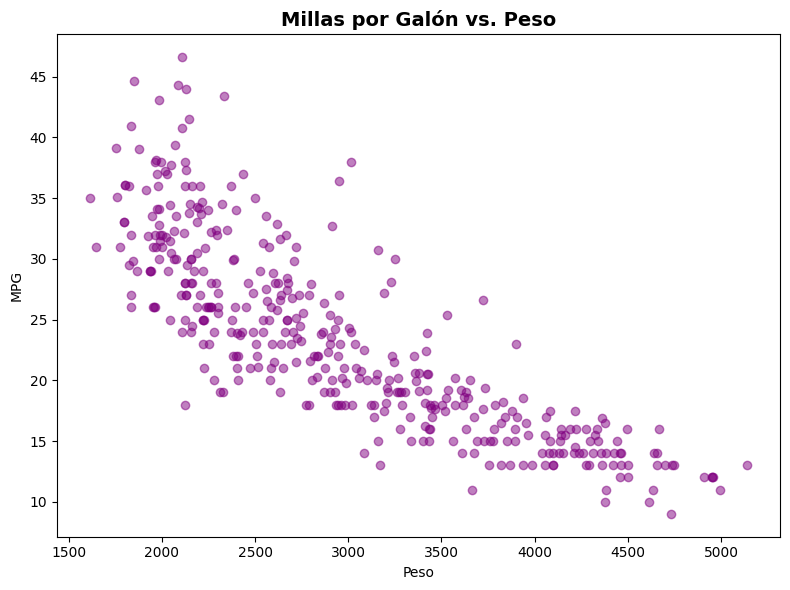

In [25]:
# graficamos

fig=plt.figure(figsize=(8,6))
plt.scatter(auto['weight'], y, color="purple", alpha=0.5, marker='o')
plt.title("Millas por Galón vs. Peso",fontsize=14,fontweight="bold")
plt.xlabel("Peso")
plt.ylabel("MPG")
plt.tight_layout()
plt.show()
plt.close()


In [26]:
# vamos a separar el dataset en Train y Test, sólo usaremos 'acceleration' como variable predictora
X_train, X_test, y_train, y_test = train_test_split(auto['weight'], y, test_size = 0.25, random_state = 16)

In [27]:
# Ahora ponemos a trabajar al arbolito...
# Usamos DecisionTreeRegressor(n_estimators = 100, random_state = 10)
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos
# instanciamos modelo
arbol = DecisionTreeRegressor(criterion='squared_error', random_state = 16)
# entrenamos...
train_df=X_train.to_frame()
arbol.fit(train_df, y_train)

# VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR sobre X_test
test_df=X_test.to_frame()
y_pred=arbol.predict(test_df)


'''
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',
max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
 ccp_alpha=0.0)
'''

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', \nmax_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, \n ccp_alpha=0.0)\n"

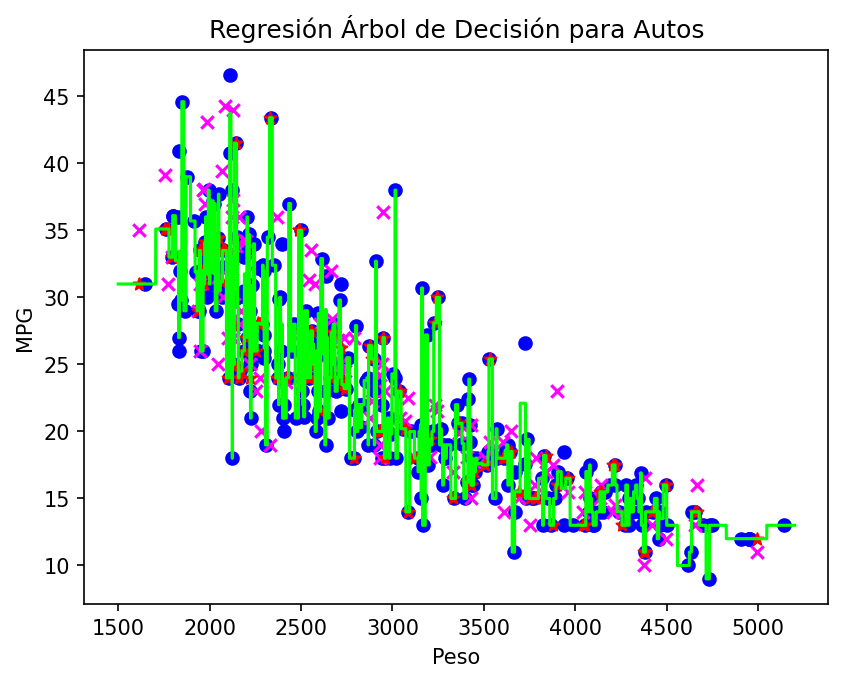

In [29]:
# definimos el rango de x para graficar
x_vect = np.arange(1500., 5200., 0.01) # es un vector numpy, NO pandas
x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col

# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(X_train, y_train, c = 'blue')     # grafica los datos
plt.plot(x_graf, arbol.predict(x_graf), color = 'lime') # id predicción
plt.scatter(X_test, y_test, color='magenta', marker='x')
plt.scatter(X_test, y_pred, color='red', marker='*')
plt.plot()
plt.title(f'Regresión Árbol de Decisión para Autos')
plt.xlabel('Peso')
plt.ylabel('MPG')
#plt.savefig('autos.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura



In [33]:
print(f'Máxima profundidad: {arbol.get_depth()}')    # 17
print(f'Cantidad de hojas: {arbol.get_n_leaves()}')  # 256


Máxima profundidad: 17
Cantidad de hojas: 256


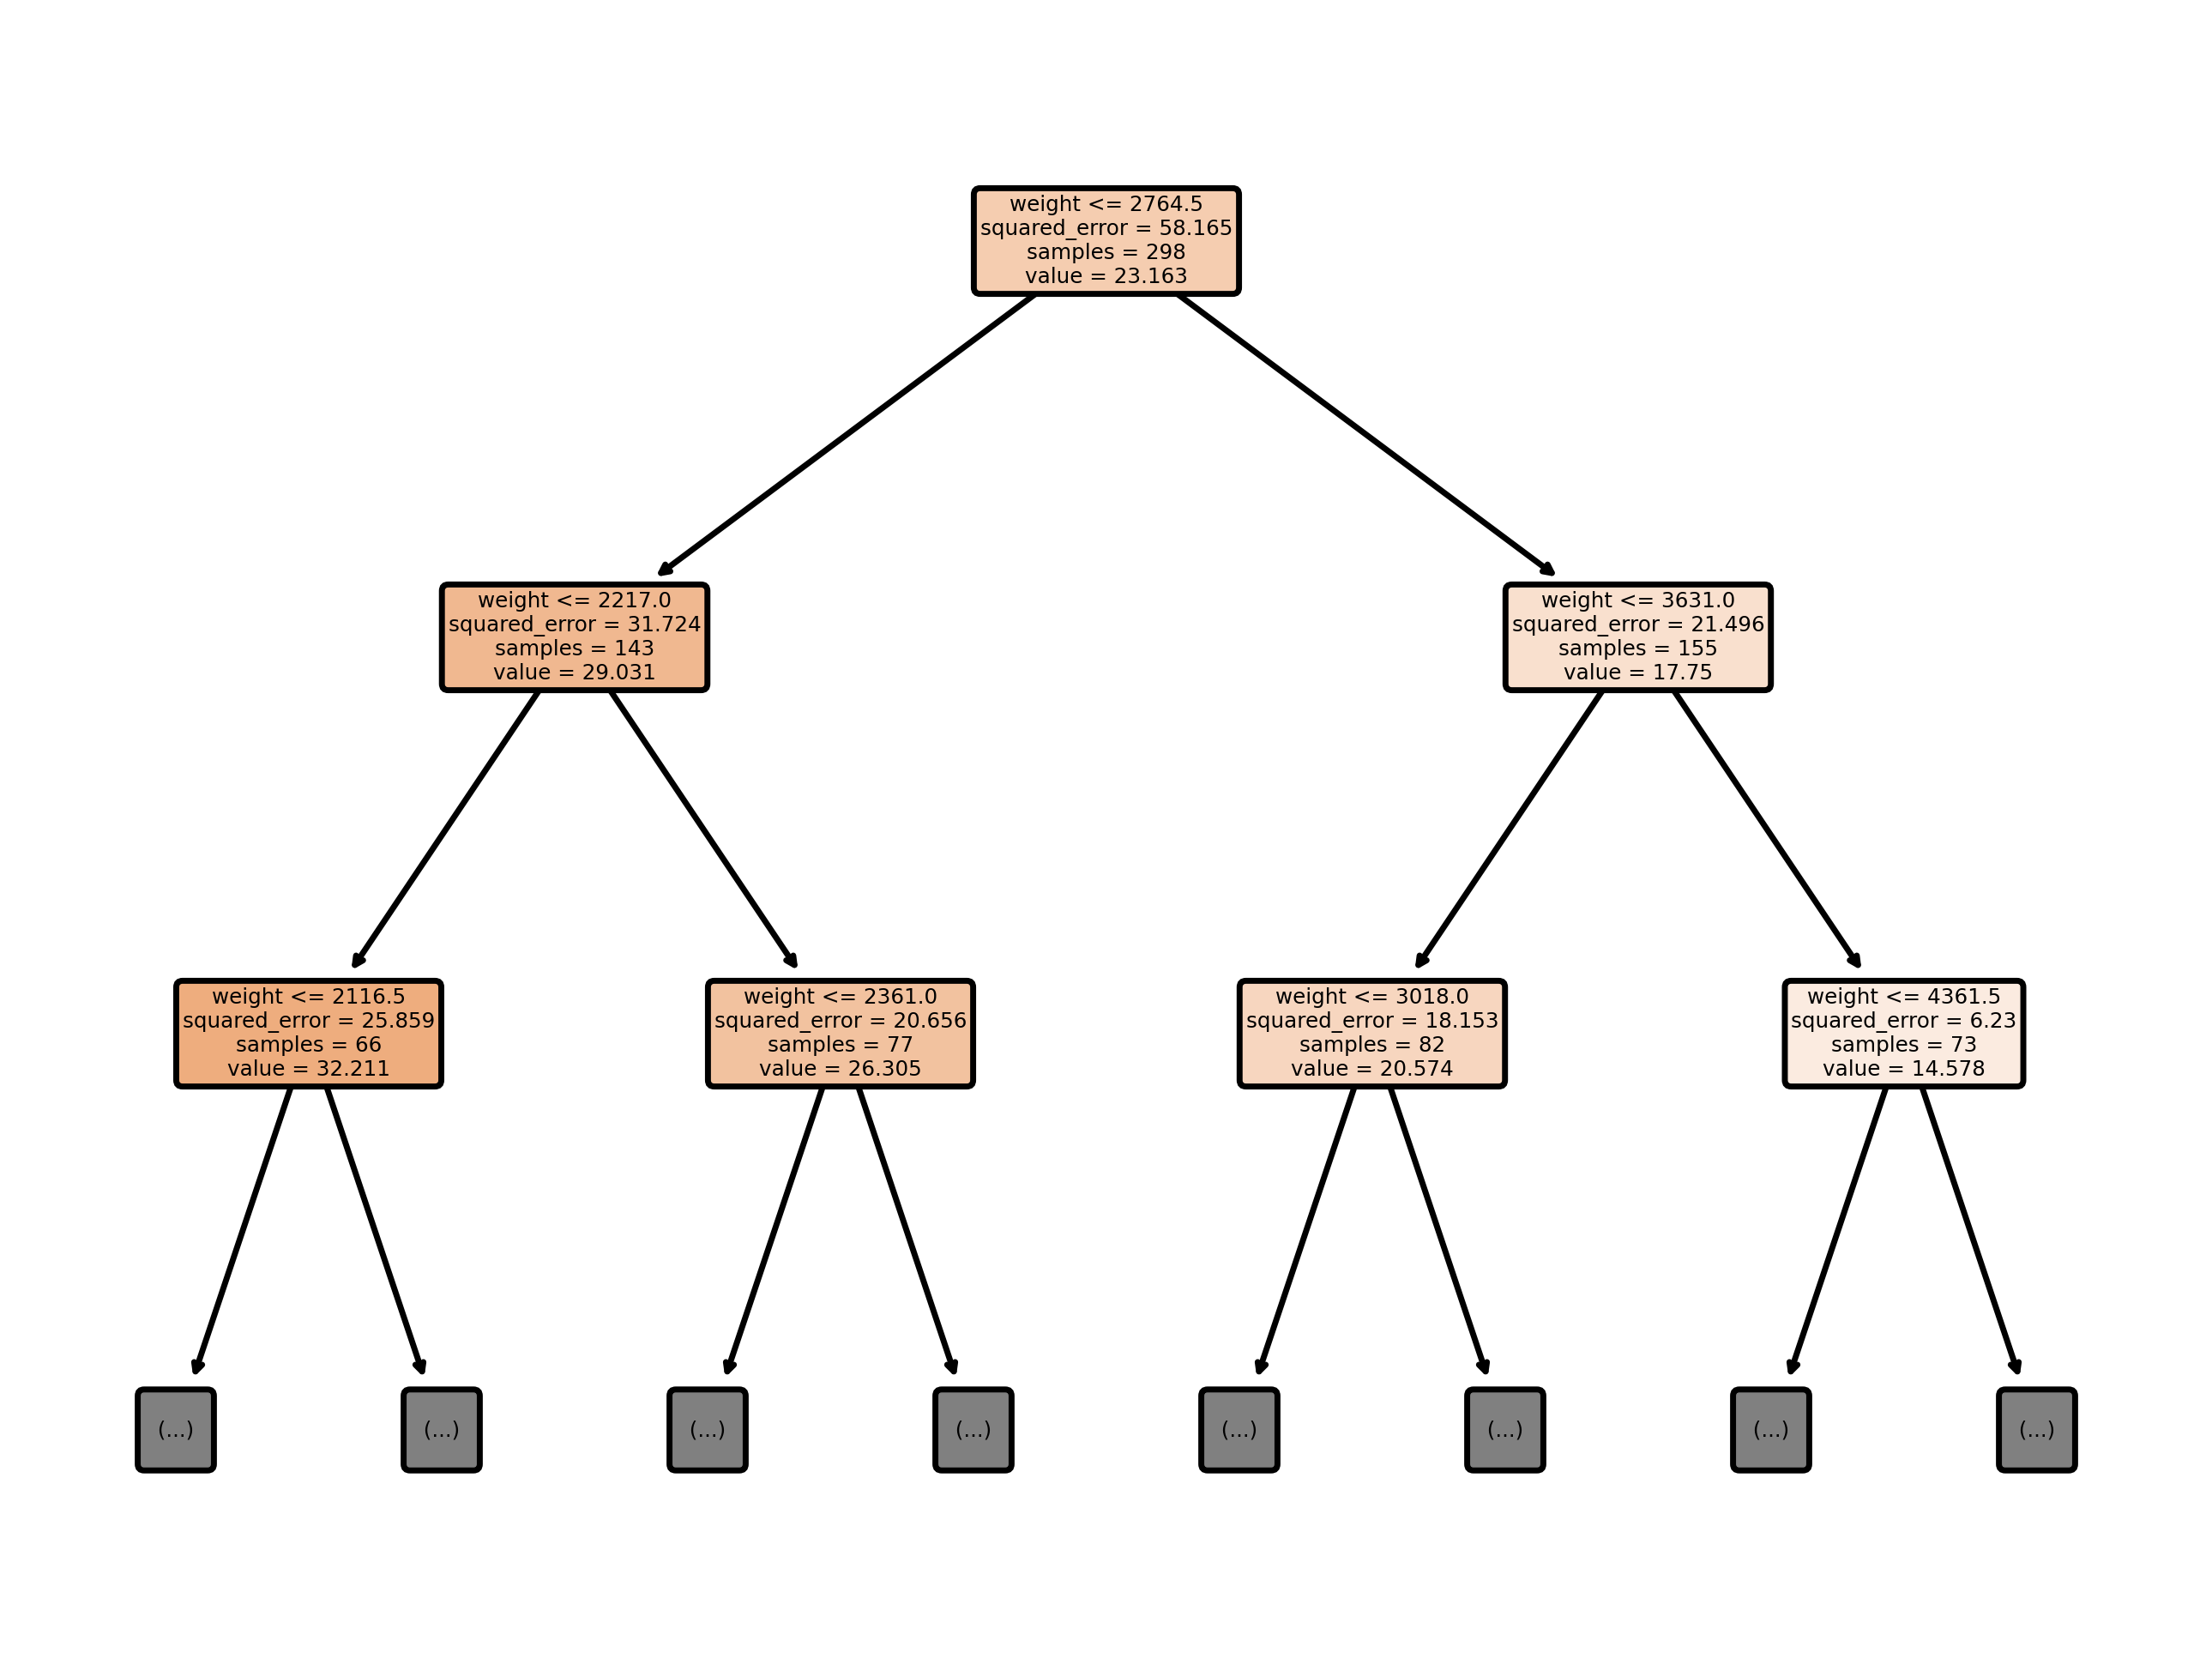

"\nsklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, \nclass_names=None, label='all', filled=False, impurity=True, node_ids=False, \nproportion=False, rounded=False, precision=3, ax=None, fontsize=None)\n\nmatplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, \nedgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, \nclear=False, **kwargs) "

In [36]:
# gráfico del árbol que hace la regresión
plt.figure(dpi=500)
plot_tree(arbol, filled=True, rounded=True, feature_names=['weight'], max_depth=2)
plt.show()
plt.close()
'''
sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None,
class_names=None, label='all', filled=False, impurity=True, node_ids=False,
proportion=False, rounded=False, precision=3, ax=None, fontsize=None)

matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None,
edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>,
clear=False, **kwargs) '''

In [37]:
# preguntamos qué tal predice sobre los datos ingresados

print(f'Precisión sobre valores REALES: {arbol.score(train_df, y_train)}')
print(f'Precisión sobre valores PREDICCION: {arbol.score(x_graf, arbol.predict(x_graf))}')



Precisión sobre valores REALES: 0.9742377172053995
Precisión sobre valores PREDICCION: 1.0
